In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",None)

In [35]:
fires=pd.read_csv("fire_weather.csv", parse_dates=["date"])

In [5]:
fires

,date,drybulbtemp,atm_moisture,wind_azimuth,avg_windspeed,fuelmoisture,maxtemp,mintemp,maxhumid,minhumid,precip_duration,precip_amt,moisture_type,meas_type,county,wetflag,snowflag,FIPS_NAME_x,FIPS_CODE,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_NAME_y,Shape,DATE,MONTH,CONTDATE
0,1997-10-19,69.0,30.0,162.0,7.0,6.0,70.0,35.0,82.0,28.0,0.0,0.0,2.0,1.0,017-ElDorado,N,N,ElDorado,17.0,103698,104803,FS-329722,FED,FS-FIRESTAT,FS,USCATMU,Lake Tahoe Basin Management Unit,519,Lake Tahoe Basin Management Unit,60.0,NaN,NaN,FOREST VIEW,NaN,NaN,NaN,NaN,NaN,1997,2450740.5,292,1500.0,1,Lightning,2450740.5,292.0,1545.0,0.1,A,39.018333,-120.125000,5,USFS,CA,17.0,El Dorado,NaN,1997-10-19,10,1997-10-19
1,1997-10-28,57.0,42.0,220.0,1.0,8.0,57.0,30.0,78.0,39.0,0.0,0.0,2.0,1.0,017-ElDorado,N,N,ElDorado,17.0,103157,104252,FS-329166,FED,FS-FIRESTAT,FS,USCATMU,Lake Tahoe Basin Management Unit,519,Lake Tahoe Basin Management Unit,63.0,NaN,NaN,STABLE,NaN,NaN,NaN,NaN,NaN,1997,2450749.5,301,1205.0,9,Miscellaneous,2450749.5,301.0,1422.0,0.1,A,38.961667,-119.943333,5,USFS,CA,17.0,El Dorado,NaN,1997-10-28,10,1997-10-28
2,1999-06-18,80.0,22.5,194.0,3.0,5.0,80.5,39.0,75.5,17.0,0.0,0.0,2.0,1.0,017-ElDorado,N,N,ElDorado,17.0,116784,117969,FS-343008,FED,FS-FIRESTAT,FS,USCATMU,Lake Tahoe Basin Management Unit,519,Lake Tahoe Basin Management Unit,7.0,NaN,8698,LUTHER,NaN,NaN,NaN,NaN,NaN,1999,2451347.5,169,1047.0,9,Miscellaneous,2451347.5,169.0,1049.0,0.1,A,38.800000,-119.985556,5,USFS,CA,17.0,El Dorado,NaN,1999-06-18,6,1999-06-18
3,1999-06-20,84.6,26.8,261.0,3.4,5.0,85.6,49.2,68.0,17.4,0.0,0.0,2.0,1.0,017-ElDorado,N,N,ElDorado,17.0,215100,218209,W-560557,FED,DOI-WFMI,BLM,USCACND,Central California District,CABBD,Bakersfield District,NaN,NaN,D44Z,DOLOMITE,NaN,NaN,NaN,NaN,NaN,1999,2451349.5,171,1002.0,2,Equipment Use,2451349.5,171.0,1020.0,1.0,B,38.634531,-120.844119,8,PRIVATE,CA,El Dorado,El Dorado,NaN,1999-06-20,6,1999-06-20
4,1999-06-22,87.0,32.6,221.2,2.6,5.0,87.0,54.8,76.8,28.4,0.0,0.0,2.0,1.0,017-ElDorado,N,N,ElDorado,17.0,116787,117972,FS-343011,FED,FS-FIRESTAT,FS,USCATMU,Lake Tahoe Basin Management Unit,519,Lake Tahoe Basin Management Unit,10.0,NaN,8701,CORRAL,NaN,NaN,NaN,NaN,NaN,1999,2451351.5,173,1238.0,4,Campfire,2451351.5,173.0,1339.0,0.1,A,38.867500,-119.951389,5,USFS,CA,17.0,El Dorado,NaN,1999-06-22,6,1999-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17378,2001-09-30,97.0,17.0,305.0,1.0,5.0,97.0,49.0,82.0,14.0,0.0,0.0,2.0,1.0,011-Colusa,N,N,Colusa,11.0,318867,325505,W-563662,FED,DOI-WFMI,BLM,USCANOD,Northern California District,CANOD,Northern California District,NaN,NaN,D5GJ,16,NaN,NaN,NaN,NaN,NaN,2001,2452182.5,273,2343.0,7,Arson,2452182.5,273.0,2358.0,0.2,A,38.988219,-122.345469,8,PRIVATE,CA,Colusa,Colusa,NaN,2001-09-30,9,2001-09-30
17379,2003-07-19,103.0,20.0,118.0,4.0,5.0,104.0,69.0,47.0,18.0,0.0,0.0,2.0,1.0,011-Colusa,N,N,Colusa,11.0,319377,326029,W-566032,FED,DOI-WFMI,BLM,USCANOD,Northern California District,CANOD,Northern California District,NaN,NaN,D5GJ,QUAIL,NaN,NaN,NaN,NaN,NaN,2003,2452839.5,200,1208.0,9,Miscellaneous,2452839.5,200.0,1228.0,1.0,B,39.341019,-122.535800,8,PRIVATE,CA,Colusa,Colusa,NaN,2003-07-19,7,2003-07-19
17380,2003-07-19,103.0,20.0,118.0,4.0,5.0,104.0,69.0,47.0,18.0,0.0,0.0,2.0,1.0,011-Colusa,N,N,Colusa,11.0,319378,326030,W-566033,FED,DOI-WFMI,BLM,USCANOD,Northern Califo

### Fire size and Maxtemp

(0.0, 15000.0)

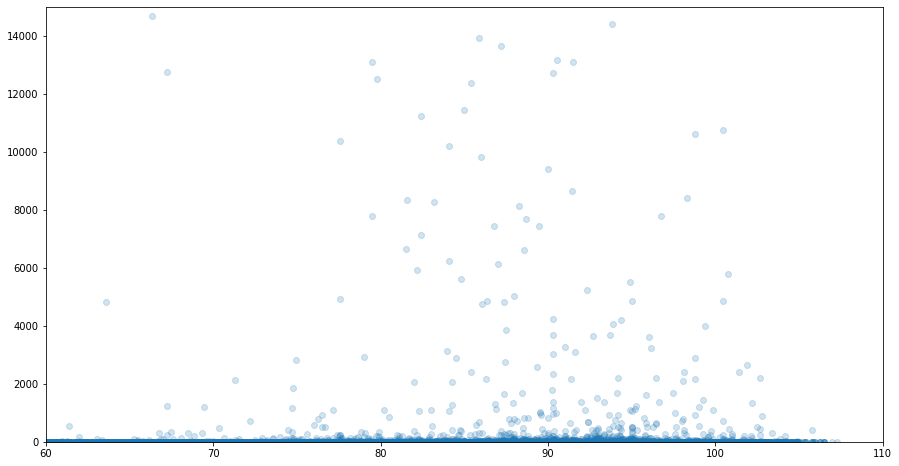

In [17]:
fig,ax = plt.subplots(figsize=(15,8))

ax.scatter(x="maxtemp",y="FIRE_SIZE",data=fires,alpha=0.2)

ax.set_xlim(60,110)
ax.set_ylim(0,15000)

### Fire size and Cause

In [25]:
fires.groupby("STAT_CAUSE_DESCR").FIRE_SIZE.agg(['median'])

,median
STAT_CAUSE_DESCR,
Arson,0.10
Campfire,0.10
Children,0.10
Debris Burning,0.10
Equipment Use,0.10
Fireworks,0.50
Lightning,0.10
Miscellaneous,0.10
Missing/Undefined,0.25


<AxesSubplot:xlabel='STAT_CAUSE_DESCR', ylabel='FIRE_SIZE'>

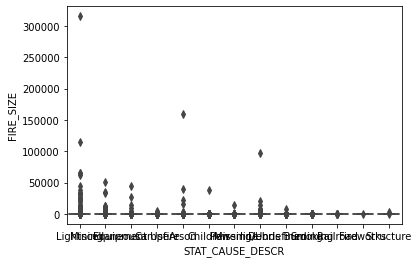

In [28]:
sns.boxplot(x="STAT_CAUSE_DESCR",y="FIRE_SIZE", data=fires)

### Fire size and Date

In [30]:
fires.FIRE_SIZE.sort_values()

10578         0.01
9342          0.01
16552         0.01
16539         0.01
1182          0.01
           ...    
16844     66113.00
550       97717.00
10394    115279.20
8751     160371.00
15085    315578.80
Name: FIRE_SIZE, Length: 17383, dtype: float64

In [31]:
fires.iloc[15085]

date                                            2012-08-12
drybulbtemp                                             92
atm_moisture                                       11.9091
wind_azimuth                                       205.636
avg_windspeed                                      5.36364
fuelmoisture                                             4
maxtemp                                            94.2727
mintemp                                            57.5455
maxhumid                                           31.0909
minhumid                                           6.27273
precip_duration                                          0
precip_amt                                               0
moisture_type                                            2
meas_type                                                1
county                                          035-Lassen
wetflag                                                  N
snowflag                                                

In [36]:
fires.date

0       1997-10-19
1       1997-10-28
2       1999-06-18
3       1999-06-20
4       1999-06-22
           ...    
17378   2001-09-30
17379   2003-07-19
17380   2003-07-19
17381   2002-08-01
17382   2012-08-29
Name: date, Length: 17383, dtype: datetime64[ns]

In [41]:
yearly=fires.groupby(fires.date.dt.year).FOD_ID.count()

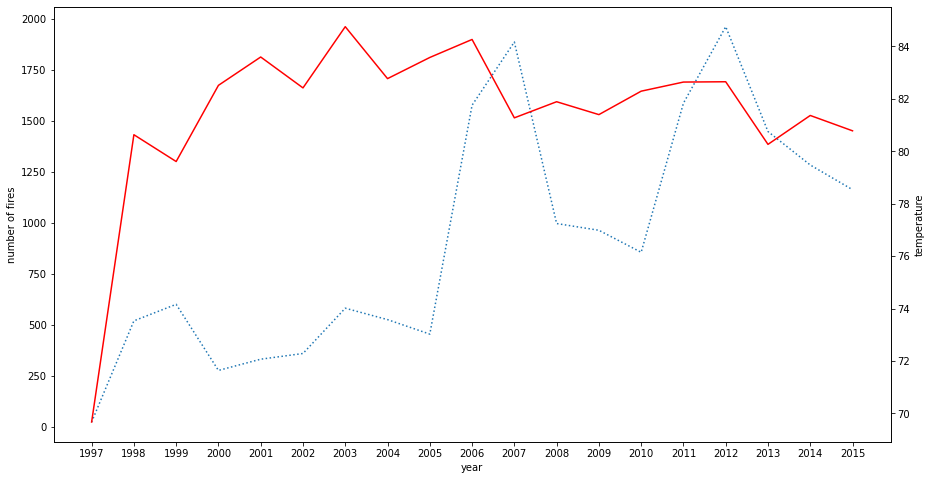

In [62]:
fig,ax=plt.subplots(figsize=(15,8))

ax.plot(yearly, linestyle="dotted", label="fire count")
ax.set_xticks(np.arange(1997,2016))
ax.set_xlabel("year")
ax.set_ylabel("number of fires")

ax2 = ax.twinx()
ax2.plot(fires.groupby(fires.date.dt.year).drybulbtemp.mean(), label="temperature", color="red")
ax2.set_ylabel("temperature")



plt.show()

### Fire size and LONGITUDE & LATITUDE

In [70]:
fires.LATITUDE

0        39.018333
1        38.961667
2        38.800000
3        38.634531
4        38.867500
           ...    
17378    38.988219
17379    39.341019
17380    39.046650
17381    39.476019
17382    39.306776
Name: LATITUDE, Length: 17383, dtype: float64

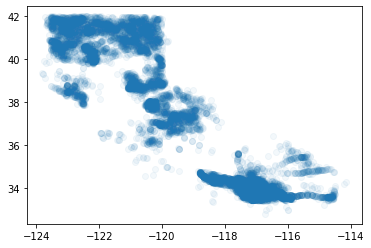

In [81]:
plt.scatter(x="LONGITUDE",y="LATITUDE",data=fires, alpha=0.05)

In [73]:
fires[["LONGITUDE","LATITUDE"]].dtypes

LONGITUDE    float64
LATITUDE     float64
dtype: object

<AxesSubplot:xlabel='FIRE_SIZE'>

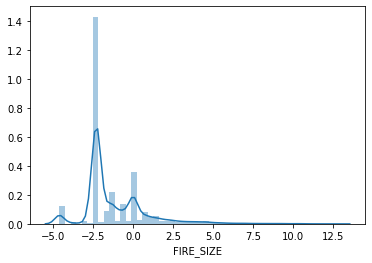

In [92]:
sns.distplot(np.log(fires.FIRE_SIZE))

### Fire Geometry

In [84]:
import geopandas as gpd

In [93]:
cali=gpd.read_file("CA_Counties_TIGER2016.shp")

In [145]:
geometry = [Point(xy) for xy in zip(fires.LONGITUDE, fires.LATITUDE)]

In [159]:
latlong=gpd.GeoDataFrame(fires[["LONGITUDE","LATITUDE","FIRE_SIZE"]],crs=4326, geometry=geometry)

In [134]:
latlong.LONGITUDE.crs= {'init' :'epsg:4326'}
latlong.LATITUDE.crs= {'init' :'epsg:4326'}

In [148]:
latlong.to_crs(3857)

,LONGITUDE,LATITUDE,geometry
0,-120.125000,39.018333,POINT (-13372253.832 4724298.005)
1,-119.943333,38.961667,POINT (-13352030.787 4716182.138)
2,-119.985556,38.800000,POINT (-13356730.952 4693063.644)
3,-120.844119,38.634531,POINT (-13452305.792 4669455.661)
4,-119.951389,38.867500,POINT (-13352927.532 4702709.817)
...,...,...,...
17378,-122.345469,38.988219,POINT (-13619435.310 4719984.186)
17379,-122.535800,39.341019,POINT (-13640622.860 4770638.006)
17380,-122.418669,39.046650,POINT (-13627583.897 4728355.989)
17381,-121.268269,39.476019,POINT (-13499521.954 4790088.403)


In [1]:
#latlong.LONGITUDE.to_crs(3857)

In [120]:
latlong

,LONGITUDE,LATITUDE
0,-120.125000,39.018333
1,-119.943333,38.961667
2,-119.985556,38.800000
3,-120.844119,38.634531
4,-119.951389,38.867500
...,...,...
17378,-122.345469,38.988219
17379,-122.535800,39.341019
17380,-122.418669,39.046650
17381,-121.268269,39.476019


original 4326
EPSG:3395

In [149]:
latlong.geometry.to_crs(3857)

0        POINT (-13372253.832 4724298.005)
1        POINT (-13352030.787 4716182.138)
2        POINT (-13356730.952 4693063.644)
3        POINT (-13452305.792 4669455.661)
4        POINT (-13352927.532 4702709.817)
                       ...                
17378    POINT (-13619435.310 4719984.186)
17379    POINT (-13640622.860 4770638.006)
17380    POINT (-13627583.897 4728355.989)
17381    POINT (-13499521.954 4790088.403)
17382    POINT (-13517245.019 4765710.354)
Name: geometry, Length: 17383, dtype: geometry

<AxesSubplot:>

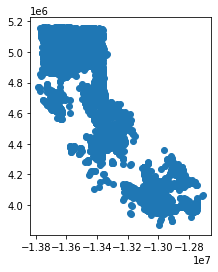

In [150]:
latlong.geometry.to_crs(3857).plot()

In [165]:
latlong.geometry.to_crs(3857).x

0       -1.337225e+07
1       -1.335203e+07
2       -1.335673e+07
3       -1.345231e+07
4       -1.335293e+07
             ...     
17378   -1.361944e+07
17379   -1.364062e+07
17380   -1.362758e+07
17381   -1.349952e+07
17382   -1.351725e+07
Length: 17383, dtype: float64

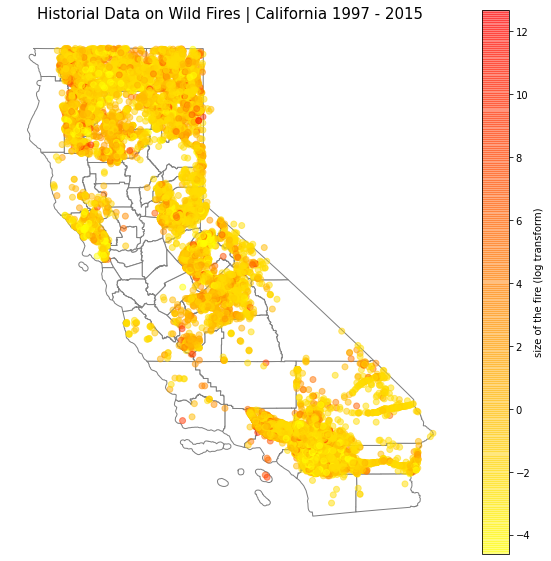

In [189]:
fig,ax=plt.subplots(figsize=(10,10))
cali.plot(ax=ax, color="#ffffff", edgecolor="grey")

m=ax.scatter(x=latlong.geometry.to_crs(3857).x,
           y=latlong.geometry.to_crs(3857).y,
           c=np.log(latlong['FIRE_SIZE']),
           cmap=plt.cm.autumn_r,
           alpha=0.5)

fig.colorbar(m, label="size of the fire (log transform)")

ax.axis("off")

ax.set_title("Historial Data on Wild Fires | California 1997 - 2015", size=15)




fig.savefig("map")